/tools.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mean_0[0], mean_0[1], c='black', cmap=cmap, marker='x')
/tools.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mean_1[0], mean_1[1], c='green', cmap=cmap, marker='x')


Number of samples: 6


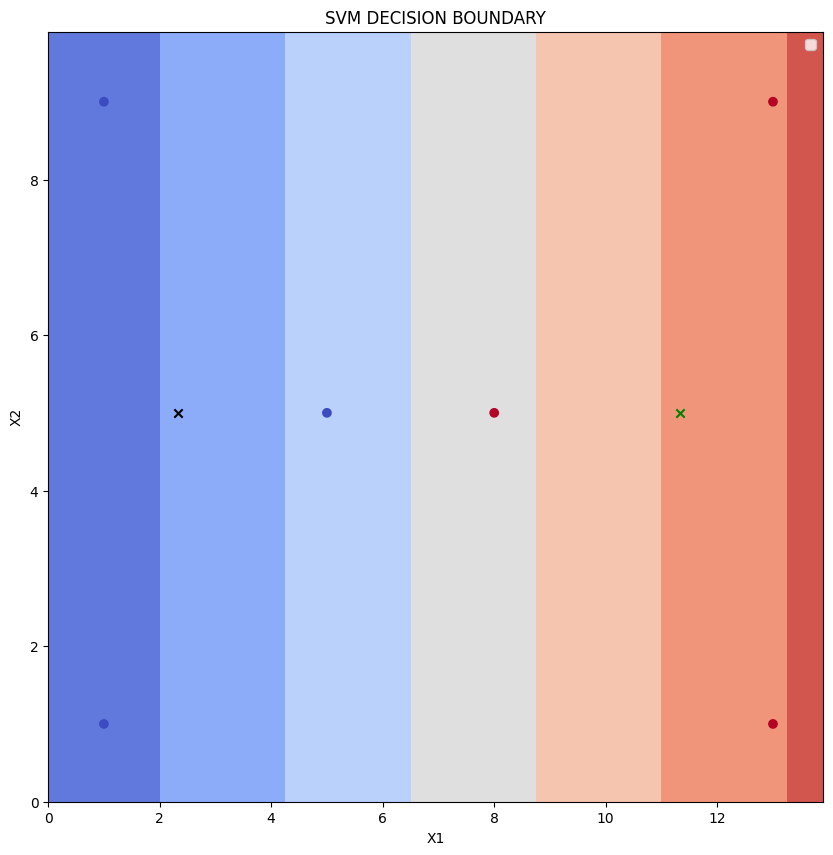

In [3]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import files
import imp

# Specify the file path of the module
module_path = "/tools.py"

# Load the module
tools_module = imp.load_source('tools', module_path)



# Given binary dataset
class0 = np.array([[1, 9], [5, 5], [1, 1]])
class1 = np.array([[8, 5], [13, 1], [13, 9]])

# How many samples (rows) are there?
num_samples = len(class0) + len(class1)
print("Number of samples:", num_samples)

# Concatenate the two matrices
data = np.concatenate((class0, class1))
labels = np.concatenate((np.zeros(len(class0)), np.ones(len(class1))))

# Create a linear SVM classifier with a high cost of misclassifying training data
clf = svm.SVC(kernel='linear', C=1e10)

# Fit the classifier to the data
clf.fit(data, labels)

# Get the support vectors and the coefficients of the decision boundary
support_vectors = clf.support_vectors_
coef = clf.coef_[0]
intercept = clf.intercept_

# Plot the scatter plot, support vectors, and decision boundary
X1, X2 = tools_module.make_meshgrid(data, labels, step=0.1)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

tools_module.plot_decision_boundary(data, labels, X1, X2, Z)


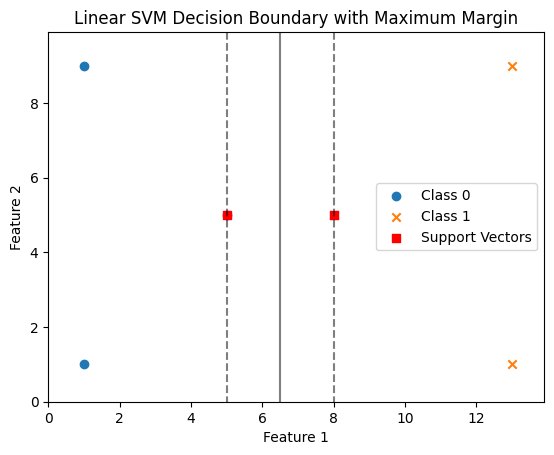

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Given binary dataset
class0 = np.array([[1, 9], [5, 5], [1, 1]])
class1 = np.array([[8, 5], [13, 1], [13, 9]])

# Concatenate the two matrices
data = np.concatenate((class0, class1))
labels = np.concatenate((np.zeros(len(class0)), np.ones(len(class1))))

# Create a linear SVM classifier with a large 'C' value
clf = svm.SVC(kernel='linear', C=1e10)

# Fit the classifier to the data
clf.fit(data, labels)

# Get the support vectors and the coefficients of the decision boundary
support_vectors = clf.support_vectors_
coef = clf.coef_[0]
intercept = clf.intercept_

# Plot the decision boundary and support vectors
plt.scatter(class0[:, 0], class0[:, 1], marker='o', label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], marker='x', label='Class 1')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], marker='s', c='red', label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the decision boundary
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.legend()
plt.title('Linear SVM Decision Boundary with Maximum Margin')
plt.show()


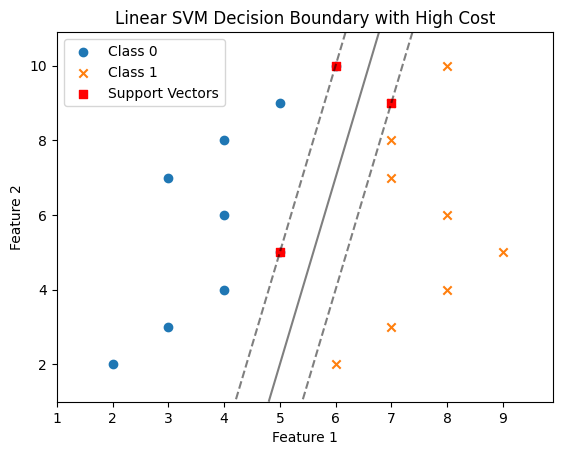

Error rate on the training data set: 0.00%


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

# Given binary dataset
class0 = np.array([[2, 2], [3, 3], [4, 4], [5, 5], [4, 6], [3, 7], [4, 8], [5, 9], [6, 10]])
class1 = np.array([[6, 2], [7, 3], [8, 4], [9, 5], [8, 6], [7, 7], [7, 8], [7, 9], [8, 10]])

# Concatenate the two matrices
data = np.concatenate((class0, class1))
labels = np.concatenate((np.zeros(len(class0)), np.ones(len(class1))))

# Create a linear SVM classifier with a high 'C' value (indicating low regularization)
clf = svm.SVC(kernel='linear', C=1e5)

# Fit the classifier to the data
clf.fit(data, labels)

# Get the support vectors and the coefficients of the decision boundary
support_vectors = clf.support_vectors_
coef = clf.coef_[0]
intercept = clf.intercept_

# Plot the points in a scatter plot
plt.scatter(class0[:, 0], class0[:, 1], marker='o', label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], marker='x', label='Class 1')

# Plot the support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], marker='s', c='red', label='Support Vectors')

# Plot the decision boundary
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Linear SVM Decision Boundary with High Cost')
plt.show()

# Calculate the error rate on the training data set
predictions = clf.predict(data)
error_rate = 1 - accuracy_score(labels, predictions)
print(f"Error rate on the training data set: {error_rate:.2%}")
